In [37]:
# импортируесм необходимые пакеты
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

colors = ["#A115FE", "#8F00FF", "#4d0585", "#591878", "#6e1f78", "#7b469c", "#2c0652",
          "#29AB50", "#22753b", "#ECE919", "#7a781d", "#0F91D0", "#0f3f75"]
sns.set_palette(sns.color_palette(colors))

In [38]:
def download_raw_data_from_drive_and_open_in_pandas(file_id="1cS6pE2ZD127iSVEiLRDzGd_b65J7GTd9", file_path="raw_data.parquet"):
    
    # скачивает файл с гугл-диска в рабочую директорию
    gdown.download(id=file_id, output=file_path)
    
    return pd.read_parquet(file_path)

In [63]:
# df = download_raw_data_from_drive_and_open_in_pandas()

# file_path = "Data/train_ai_comp_final_dp.parquet"
# pf = ParquetFile(file_path)
# df = pf.to_pandas()

df = pd.read_parquet("raw_data.parquet")

In [40]:
# делаем первый взгляд на данные

df.sample(10)

id  target  sample_ml_new  feature1  feature2  feature3  feature4  \
98081    98081       0              1      1761      1759        78    104198   
678125  678125       0              1      1049      1049        89    105213   
166324  166324       0              1      1761      1759       141      2363   
362776  362776       0              1      1761      1759        87    102259   
678864  678864       0              1      1761      1759       141    102317   
393677  393677       0              1      1761      1759        25    102392   
77991    77991       0              1      1432       721        54    102082   
118540  118540       0              1      1636      1759       141     97511   
233136  233136       1              1      1761      1759        35    105130   
534328  534328       0              1      1541      1759        74     95402   

        feature5  feature6  feature7  feature8  feature9  feature10  \
98081         80        25         0        48        89          0   
678125       191       148         0         0        11          0   
166324       191         2       125       290       298        176   
362776       191         0       125       290       298        176   
678864       191        68       125       290       298        176   
393677        14        58       125       290       298        176   
77991          5         3         0         0        18          0   
118540       191         5       125       290       298        176   
233136        56        48         0         0       189          0   
534328       191        57       125       290       298        176   

        feature11  feature12  feature13  feature14  feature15  feature16  \
98081           0        119         80          1         48         10   
678125          0        187        191          1          0          0   
166324        121        187        191        227        282        243   
362776        121         78        191        227        282        243   
678864        121        187        191        227        282        243   
393677        121        187         14        227        282        243   
77991           0        187          5          1          0          8   
118540        121         98        191        227        282        243   
233136          0        187         56          1          0        132   
534328        121        187        191        227        282        243   

        feature17  feature18  feature19  feature20  feature21  feature22  \
98081           1          7        206        206        303          0   
678125         11          0        248        248        347     140184   
166324        275         28        248        248        347     140184   
362776        275         28        248        248        347     140184   
678864        275         28        248        248        347     140184   
393677        275         28        217        217        314          0   
77991           1          1        198        198        287      41247   
118540        275         28         14         14         36          0   
233136        189         15        183        183        255     139334   
534328        275         28        248        248        347     140184   

        feature23  feature24  feature25  feature26  feature27  feature28  \
98081           9        160        204          5          8          9   
678125          9        248        829          5          8          9   
166324          9        248       1722          5          8          9   
362776          9        248       1722          5          8          9   
678864          9        248       1722          5          8          9   
393677          9        248       1722          5          8          9   
77991           9        248          2          5          8          9   
118540          9        248       1722          5      

[Text(0, 0, '0'), Text(1, 0, '1')]

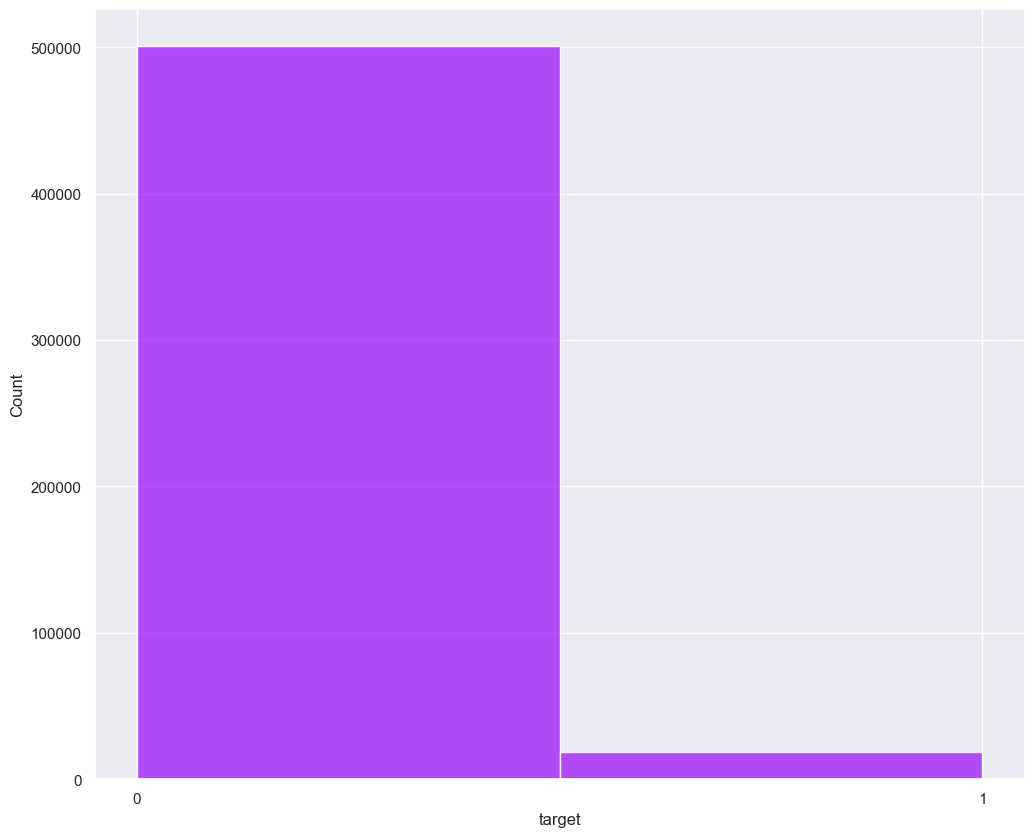

In [41]:
# смотрим на распределение значений целевой переменной

ax = sns.histplot(data=df.target, bins=2)

ax.xaxis.set_ticks([0, 1])
ax.set_xticklabels([0, 1])

!!!!!! Заголовок, оси, вывод по графику и постановка задачи

In [42]:
# выделяем таргет в отдельную переменную

target = df['target']

In [43]:
# у нас только данные для обучения

df.sample_ml_new.unique()

array([1])

Сразу можно заметить повторяющиеся неординарные значения (1761, 125, 290, 298, 176, ...) в одних колонках у разных пользователей, вероятно, кодировки категориальных признаков

In [44]:
# проверим типы данных

df.columns[df.dtypes != np.int64].to_list()

['feature642', 'feature756']

In [45]:
# проверим признаки на наличие пустых значений

df.columns[df.isna().any()].tolist()

['feature642', 'feature756']

In [46]:
df.shape

(519615, 1079)

При вероятном наличии категориальных признаков, только два столбца имеют отличающийся от числового тип данных (из-за имеющихся NaN)

In [47]:
df.feature756.unique()

array([nan])

In [48]:
df.feature642.unique()

array([ 0., nan,  1.])

In [49]:
df.feature642.value_counts(dropna=False) / df.shape[0] * 100

feature642
NaN    60.684160
0.0    38.552197
1.0     0.763642
Name: count, dtype: float64

В признаке feature756 имеем только пустые значения. Эту колонку дропнем - она не даст пользы модели
В признаке feature642 имеем около 61% пустых значений, 38% нулей и меньше 1% единиц. Для принятия решения по этой колонке проверим корреляцию с целевой переменной

In [50]:
df[['target', 'feature642']].fillna('999').corr()

,target,feature642
target,1.0000,0.0308
feature642,0.0308,1.0000


In [61]:
df[['target', 'feature988']].corr()

,target,feature988
target,1.000000,-0.048093
feature988,-0.048093,1.000000


In [62]:
df[['target', 'feature8']].corr()

,target,feature861
target,1.000000,-0.033182
feature861,-0.033182,1.000000


Корреляция

In [17]:
# дропаем ненужные колонки

df.drop(['id', 'target', 'sample_ml_new', 'feature756'
         #'feature642', 
         ], axis=1, inplace=True)

Из-за отсутствия описания признаков для нас неочевидно, какие из них являются категориальными, какие - датами, а какие - числовыми. При этом нам важно попробовать выделить категориальные для применения более подходящей обработки перед обучением

Для начала посмотрим на кол-во уникальных значений в каждом признаке

In [18]:
df.nunique()

feature1         1728
feature2         1728
feature3          141
feature4        80146
feature5          189
feature6          281
feature7          120
feature8          287
feature9          297
feature10         168
feature11         117
feature12         184
feature13         189
feature14         225
feature15         279
feature16         243
feature17         273
feature18          29
feature19         219
feature20         219
feature21         291
feature22      108457
feature23           8
feature24         239
feature25        1649
feature26           4
feature27           7
feature28           8
feature29         241
feature30        1666
feature31         489
feature32        1358
feature33       39329
feature34       41131
feature35       52160
feature36        2784
feature37       65129
feature38       10855
feature39        8780
feature40       12372
feature41        5816
feature42        2405
feature43       47945
feature44        5368
feature45        9845
feature46 

Можем заметить следующие особенности: 
- признаки со всего одним уникальным значением
- признаки с повторящимся кол-вом уникальных значений (в основном - попарно)

In [19]:
# найдем и дропнем все признаки с одним уникальным значением

df.drop(df.columns[df.nunique() == 1].to_list(), axis=1, inplace=True)

In [20]:
# группы с одинаковым кол-вом значений

l00 = ['feature1', 'feature2']     # одинаковое количество, но разное распределение
l01 = ['feature19', 'feature20']
l02 = ['feature210', 'feature211']
l03 = ['feature212', 'feature213']
l04 = ['feature220', 'feature221']
l05 = ['feature222', 'feature223']
l06 = ['feature227', 'feature228']
l07 = ['feature322', 'feature323']
l08 = ['feature890', 'feature891'] # близко, но неидентично по распределению
l09 = ['feature916', 'feature917'] # близко, но неидентично по распределению
l10 = ['feature918', 'feature919'] # одинаковое количество, но разное распределение
l11 = ['feature1038', 'feature1039', 'feature1040', 'feature1041']
l12 = ['feature1045', 'feature1046', 'feature1047', 'feature1048']
l13 = ['feature1059', 'feature1060', 'feature1061', 'feature1062']

array([[<Axes: title={'center': 'feature19'}>,
        <Axes: title={'center': 'feature20'}>]], dtype=object)

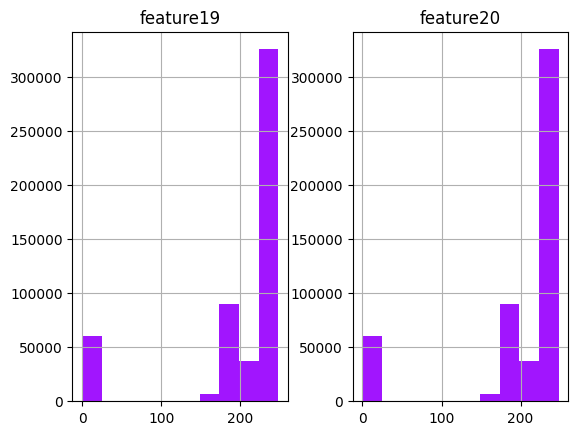

In [21]:
df[l01].hist()

In [22]:
df[l01].corr()

,feature19,feature20
feature19,1.000000,0.999775
feature20,0.999775,1.000000


array([[<Axes: title={'center': 'feature916'}>,
        <Axes: title={'center': 'feature917'}>]], dtype=object)

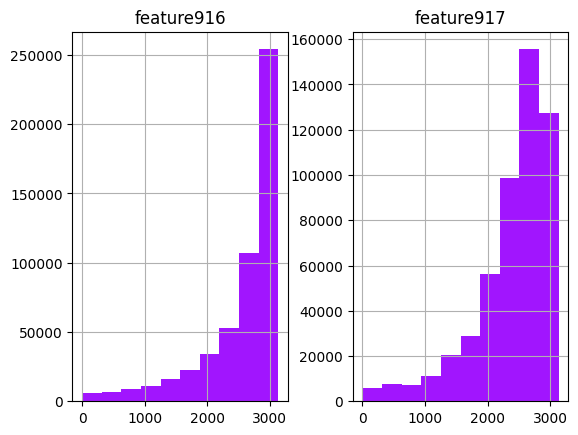

In [23]:
df[l09].hist()

In [24]:
df[l09].corr()

,feature916,feature917
feature916,1.000000,0.460222
feature917,0.460222,1.000000


Оставим по одному "идентичному" (равное кол-во уникальных значений + максимальная корреляция). На данный момент мы не можем извлечь смысл из этих признаков и считаем их частичное удаление лучшим вариантом

In [25]:
repeatable_columns = []

repeatable_columns.append(l01[1:])
repeatable_columns.append(l02[1:])
repeatable_columns.append(l03[1:])
repeatable_columns.append(l04[1:])
repeatable_columns.append(l05[1:])
repeatable_columns.append(l06[1:])
repeatable_columns.append(l07[1:])
repeatable_columns.append(l11[1:])
repeatable_columns.append(l12[1:])
repeatable_columns.append(l13[1:])

for i in repeatable_columns:
    for j in i:
        df.drop(j, axis=1, inplace=True)

In [26]:
df.shape

(519615, 971)

Мы отказались от 100 признаков, продолжим изучать данные и искать категориальные значения

In [27]:
highly_possible_categorical_columns = df.columns[df.max() - df.min() == 1].to_list()

С большой вероятностью к категориальным признакам могут быть отнесены признаки с минимальным разбросом значений, а так же колонки с большим количеством значений, равных 0

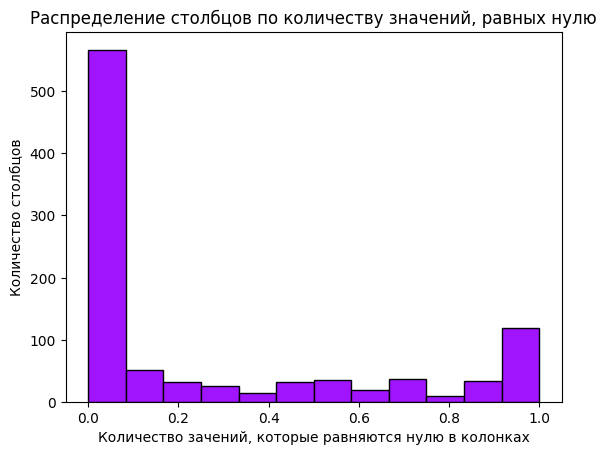

In [28]:
plt.hist((df.shape[0] - df[df != 0].count()) / df.shape[0], bins = 12, color='#A115FE', edgecolor = 'black')

plt.title('Распределение столбцов по количеству значений, равных нулю')
plt.xlabel('Количество зачений, которые равняются нулю в колонках')
plt.ylabel('Количество столбцов')

plt.show()

!!!!!!! Вывод

In [29]:
# категориальные признаки в потенциально категориальных мы будем искать через два обязательных условия:
# высокая (более или = 0.9) доля значений, равных 0
# низкая (менее или = 10000, что составляет менее 1% от количества строк) доля уникальных значений

possibly_categorical_columns = \
    set(df.columns[(df.shape[0] - df[df != 0].count()) / df.shape[0] >= 0.9].to_list()) & \
    set((df.nunique()[(df.nunique() <= 5000)]).index.to_list()) & \
    set(df.columns[df.max() - df.min() > 1])

In [30]:
len(possibly_categorical_columns)

41

In [31]:
len(highly_possible_categorical_columns)

141

In [32]:
categorical_columns = list(possibly_categorical_columns) + highly_possible_categorical_columns

В результате анализа признаков мы пришли к выводу, что 182 из них (помимо ранее удаленных признаков с одним значением) могут быть отнесены к категориальным и требовать дополнительной обработки

In [33]:
df_categorical = df[categorical_columns]
df_categorical.shape

(519615, 182)

In [34]:
df_continuous = df.loc[:, ~df.columns.isin(categorical_columns)]
df_continuous.shape

(519615, 789)

!!!! Вывод

<Axes: >

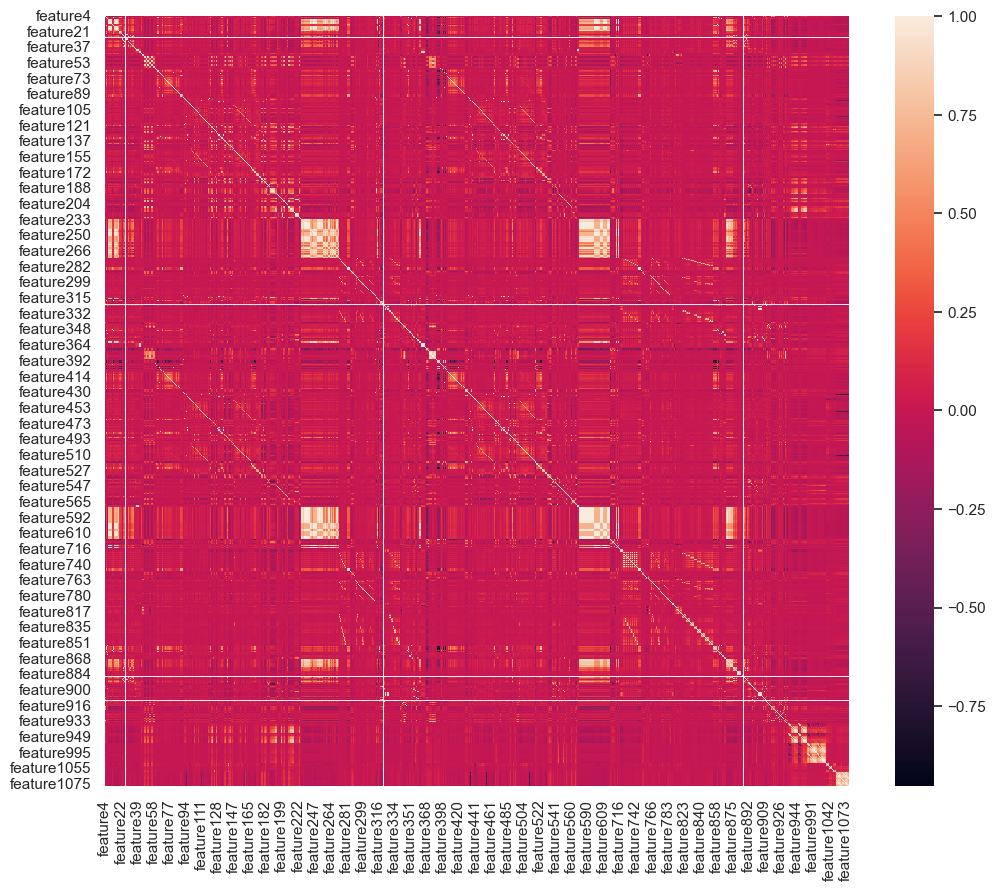

In [35]:
corr = df_continuous.sample(100000).iloc[:, 3:].corr()
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(corr)

!!!! Вывод